# Customer Segmentation - Exploratory Data Analysis (EDA)

This notebook performs an exploratory analysis of customer data from a marketing campaign. The goal is to identify meaningful patterns in demographics, income, spending, and response behavior to prepare the data for clustering.

## Step 1: Data Overview

In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("marketing_campaign.xlsx")
df.shape, df.dtypes


((2240, 29),
 ID                              int64
 Year_Birth                      int64
 Education                      object
 Marital_Status                 object
 Income                        float64
 Kidhome                         int64
 Teenhome                        int64
 Dt_Customer            datetime64[ns]
 Recency                         int64
 MntWines                        int64
 MntFruits                       int64
 MntMeatProducts                 int64
 MntFishProducts                 int64
 MntSweetProducts                int64
 MntGoldProds                    int64
 NumDealsPurchases               int64
 NumWebPurchases                 int64
 NumCatalogPurchases             int64
 NumStorePurchases               int64
 NumWebVisitsMonth               int64
 AcceptedCmp3                    int64
 AcceptedCmp4                    int64
 AcceptedCmp5                    int64
 AcceptedCmp1                    int64
 AcceptedCmp2                    int64
 Complain   

In [8]:
# Feature Engineering: Total_Spent
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288


## Step 2: Missing Values and Duplicate Check

In [12]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Spent             0
dtype: int64

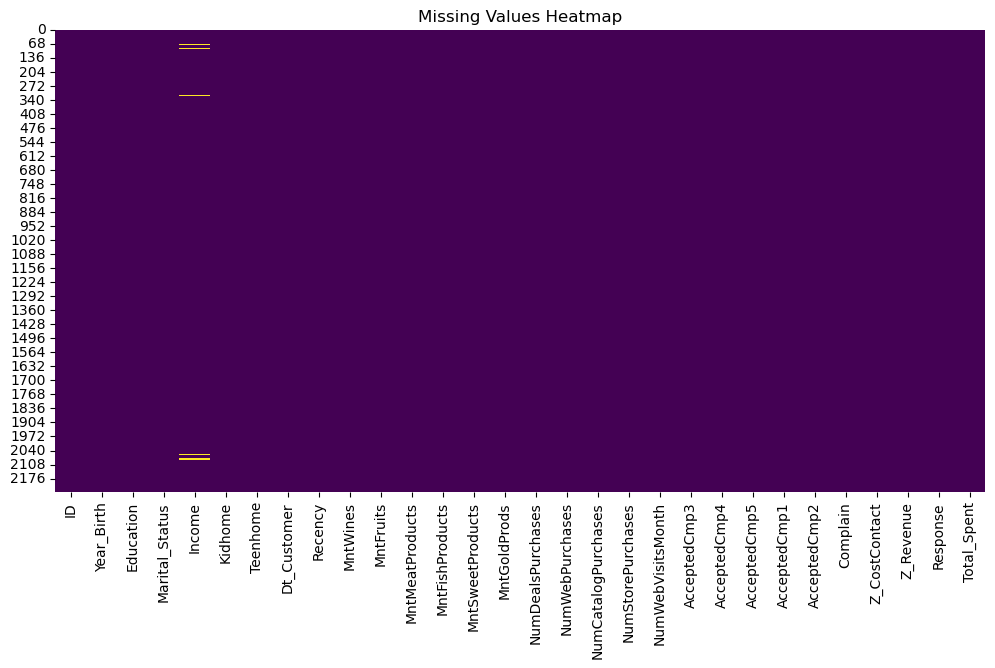

In [13]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


**Observation:**

- Missing values are present only in the `Income` column and should be imputed or handled.
- No duplicate records were found in the dataset.

In [14]:
df.duplicated().sum()

0

## Step 3: Univariate Analysis

### Focused Distribution Plots
Here are a few key variable distributions visualized clearly.

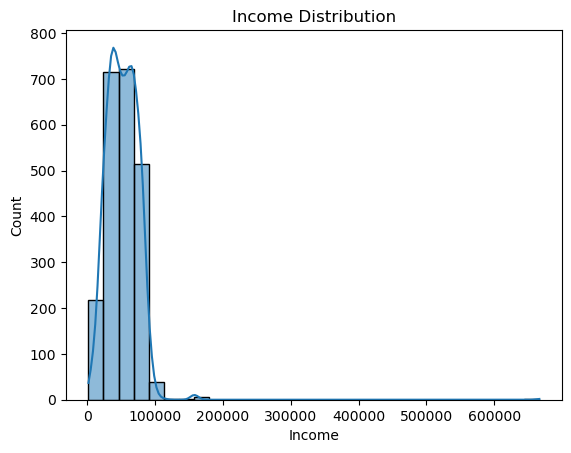

In [15]:
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

**Observation:**

- Income distribution is right-skewed.
- Most customers earn less than ₹100,000.

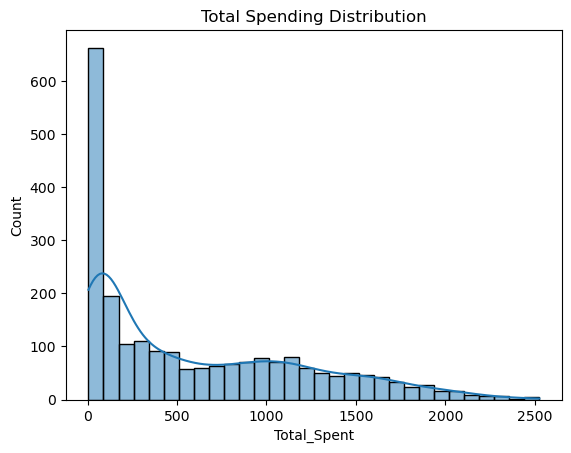

In [16]:
sns.histplot(df['Total_Spent'], bins=30, kde=True)
plt.title('Total Spending Distribution')
plt.show()

**Observation:**

- Spending on wines and meat products shows variability.
- A large portion of customers spend below ₹1000 in most categories.

**Observation:**

- Customers tend to spend more on wines and meat than other product categories.

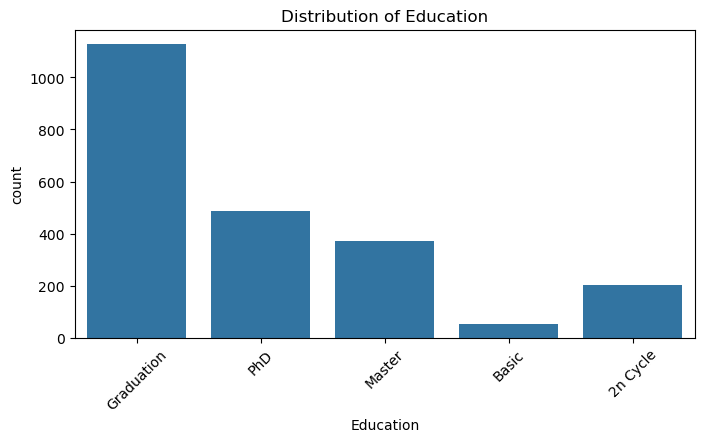

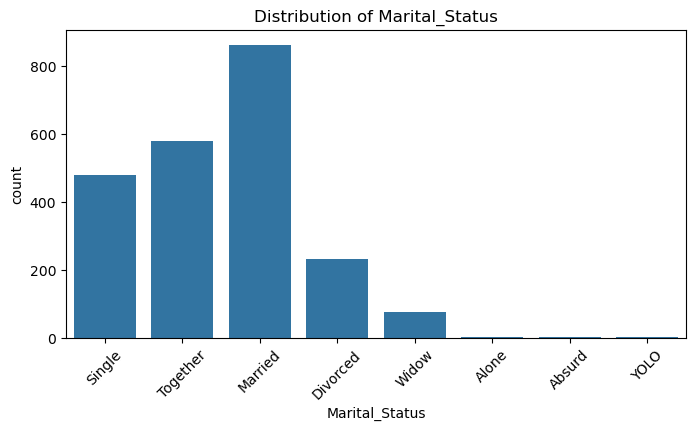

In [17]:

# Categorical features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()


**Observation:**

- Spending on gold products and sweet products is relatively low for most customers.

## Step 4: Bivariate and Multivariate Analysis

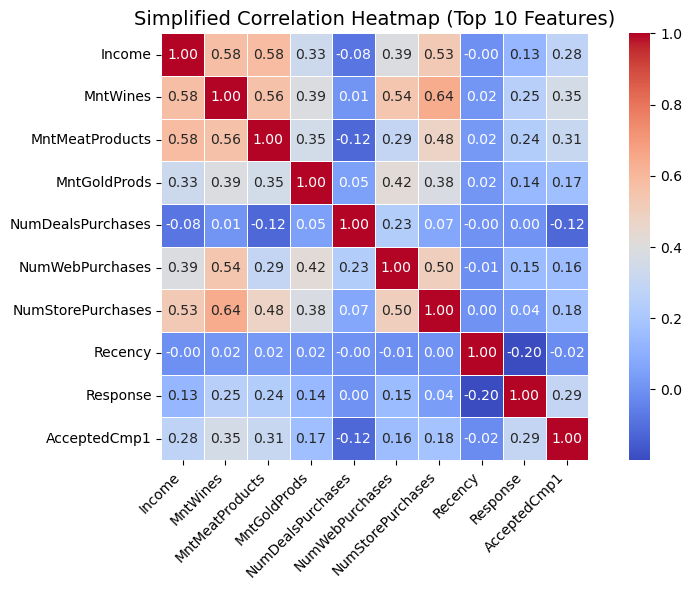

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define only key relevant columns
key_columns = ['Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases',
               'Recency', 'Response', 'AcceptedCmp1']

# Generate correlation matrix for these columns only
corr_matrix = df[key_columns].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5,
            cbar=True, square=True)
plt.title("Simplified Correlation Heatmap (Top 10 Features)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Observation:**

This heatmap shows the relationships between key numerical variables:
- `Income` is positively correlated with spending on wine, meat, and gold products.
- `Recency` is negatively correlated with most spending behaviors.
- Customers who recently purchased tend to spend more.

**Observation:**

- Higher income individuals are more likely to respond to campaigns.
- There is a trend between purchase behavior and response rates.

## Step 5: Outlier Detection using Z-Score

In [19]:
numerical_cols = df.select_dtypes(include='number').columns

In [20]:

from scipy.stats import zscore

z_scores = df[numerical_cols].apply(zscore)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df[filtered_entries]
df_clean.shape


(0, 30)

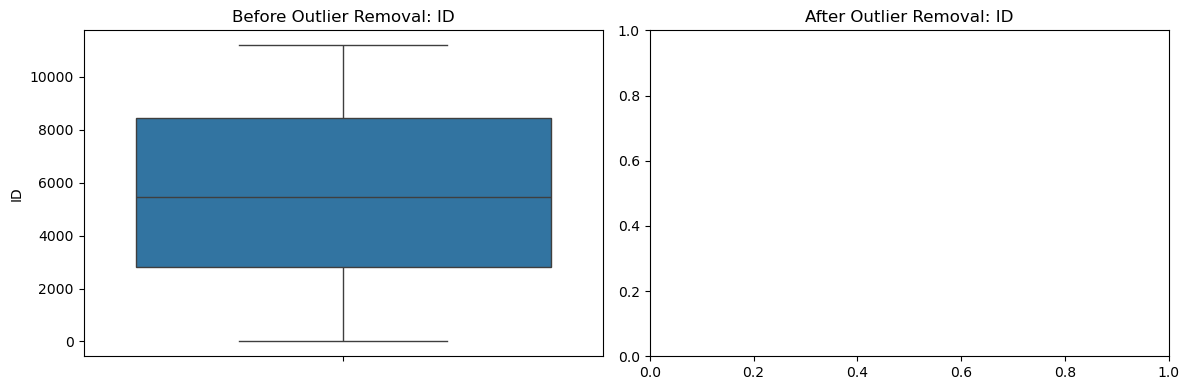

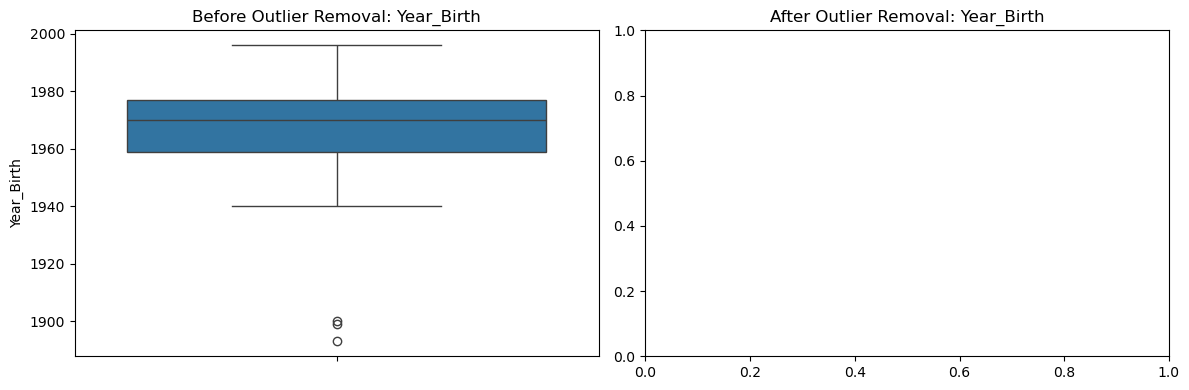

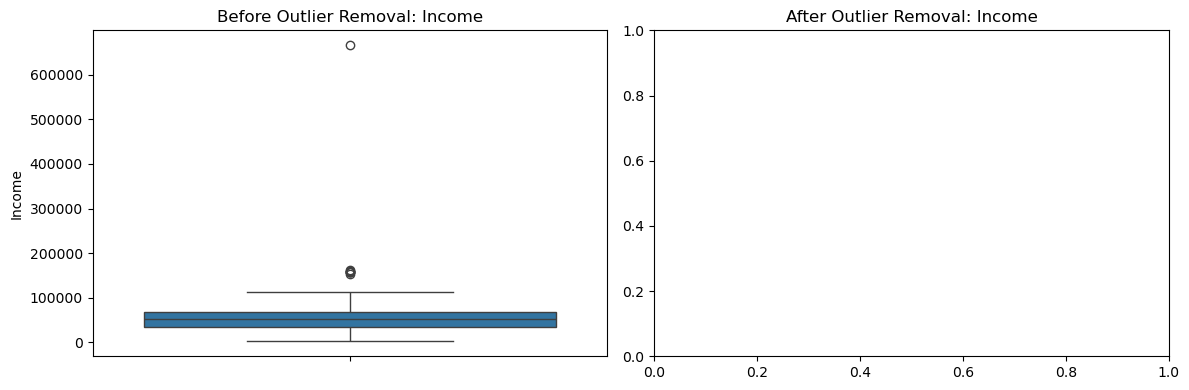

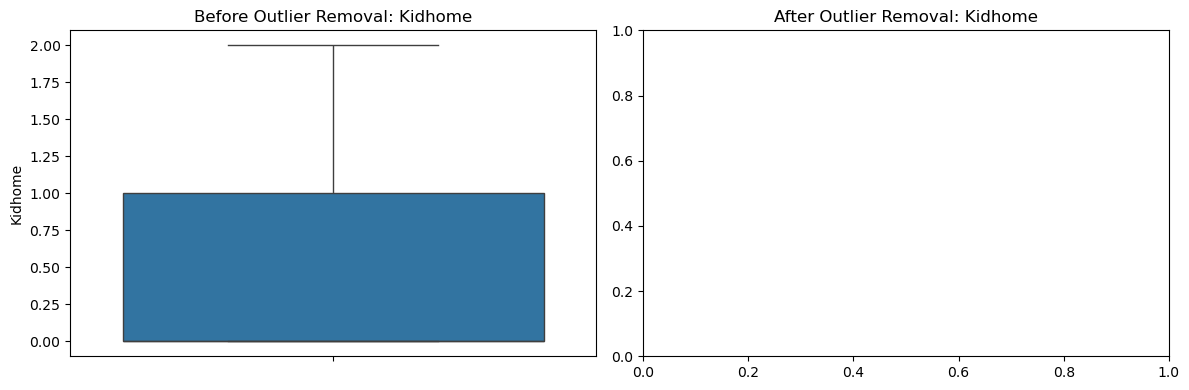

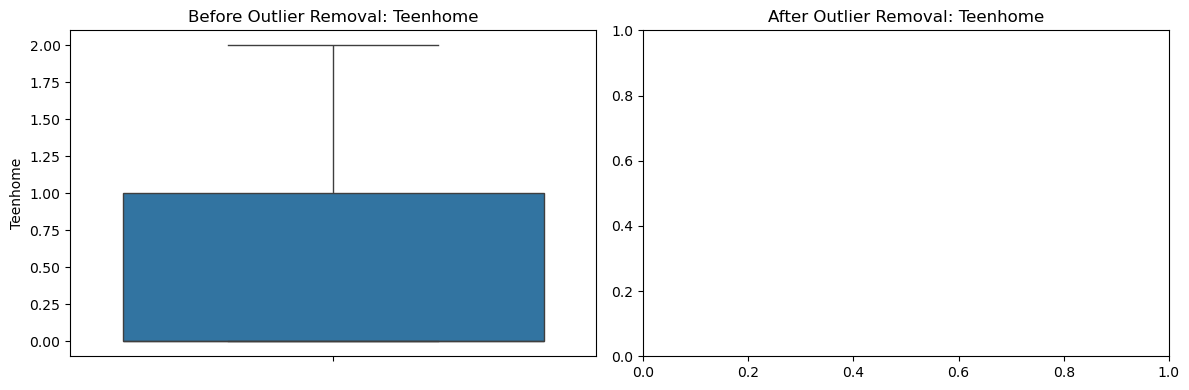

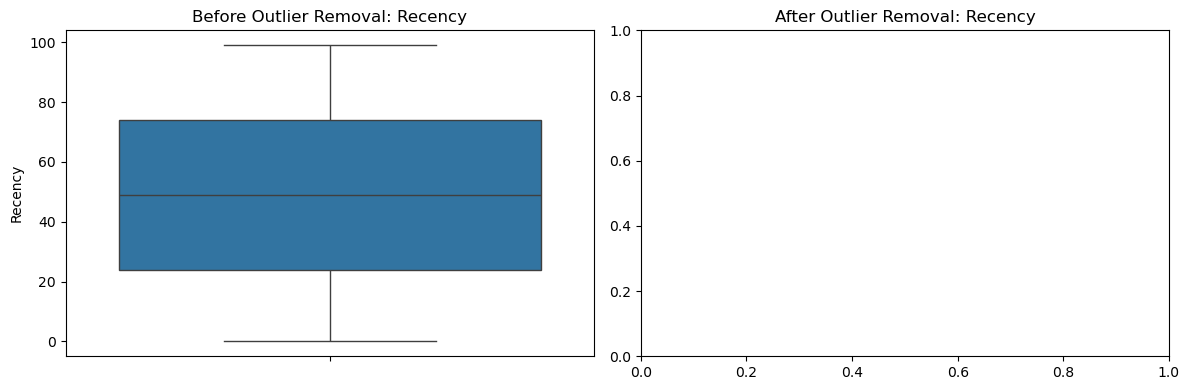

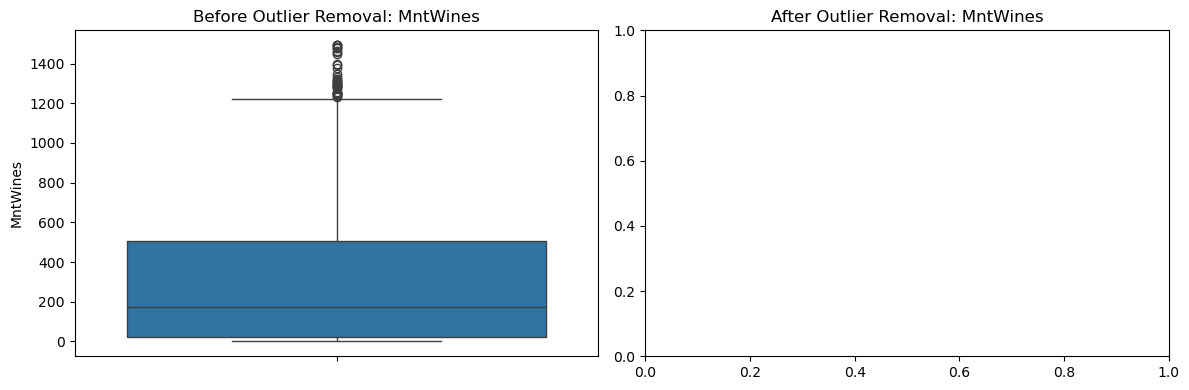

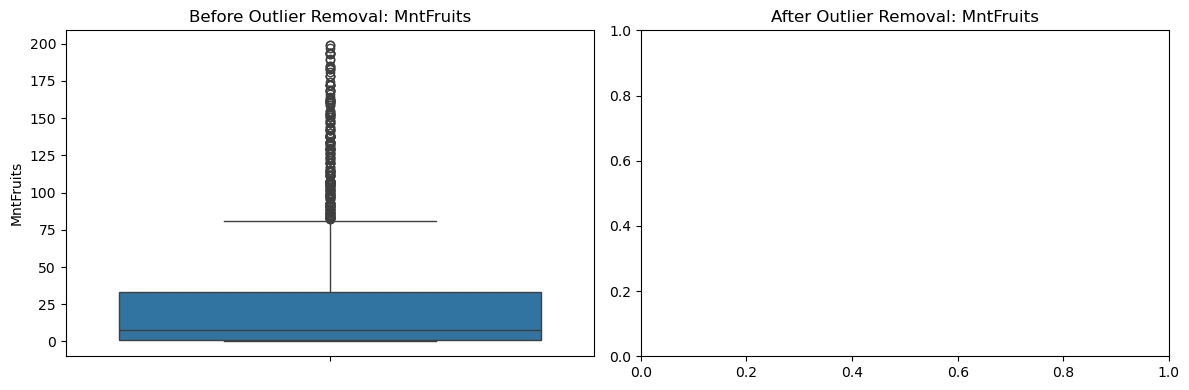

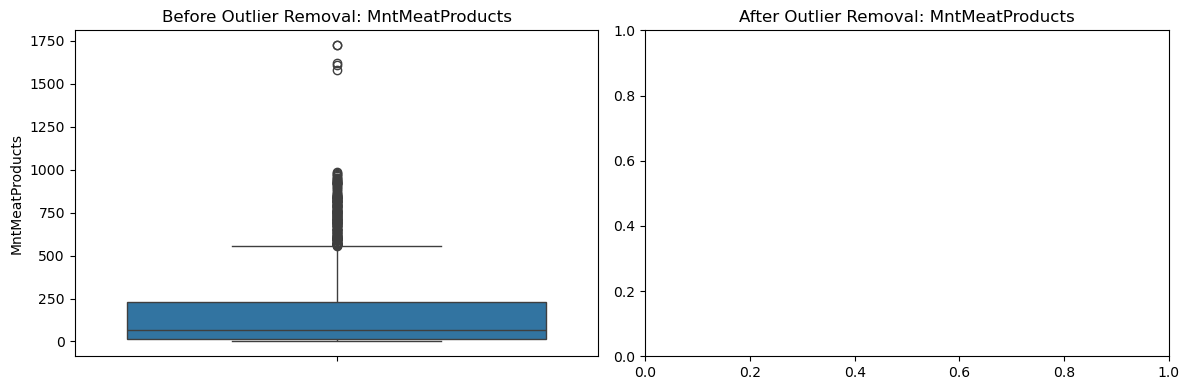

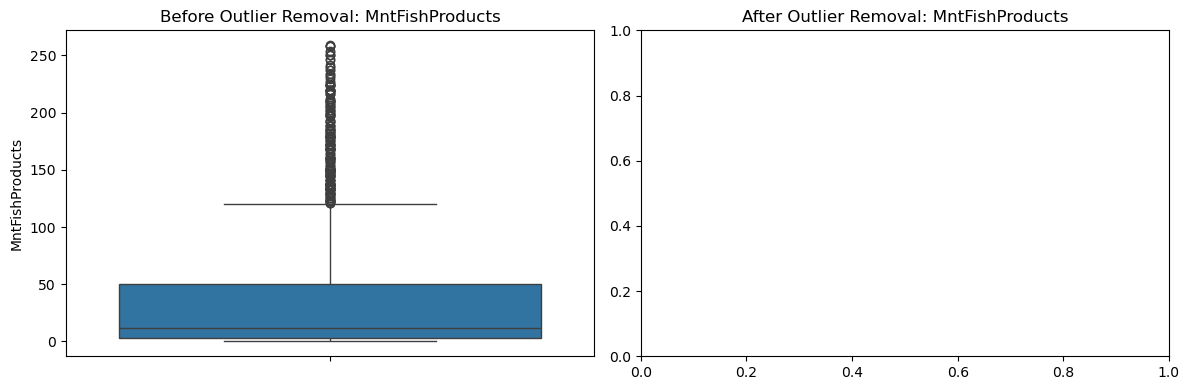

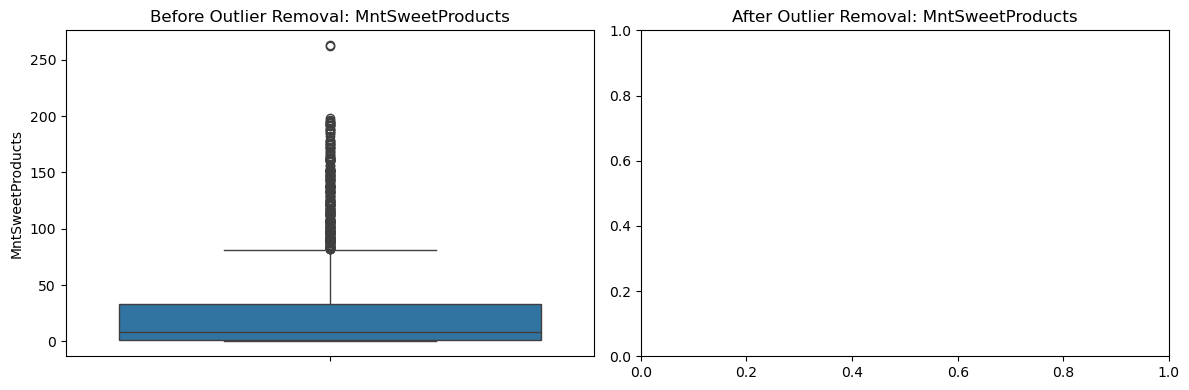

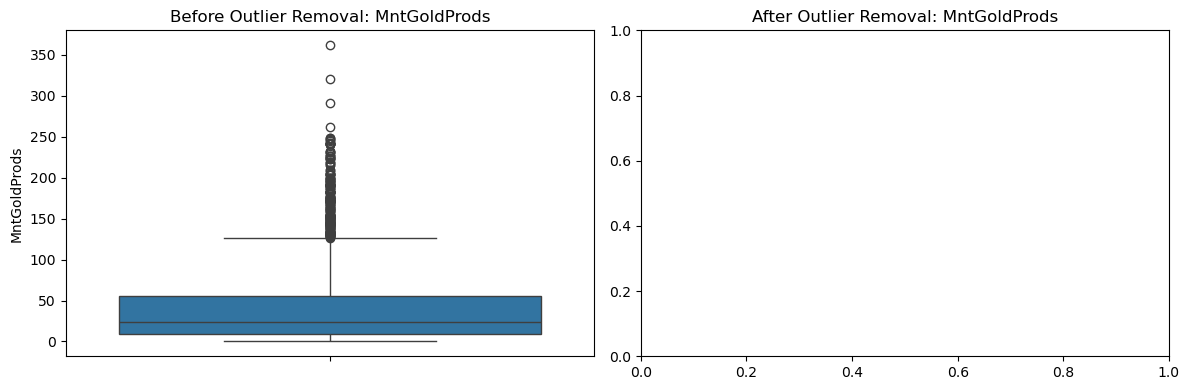

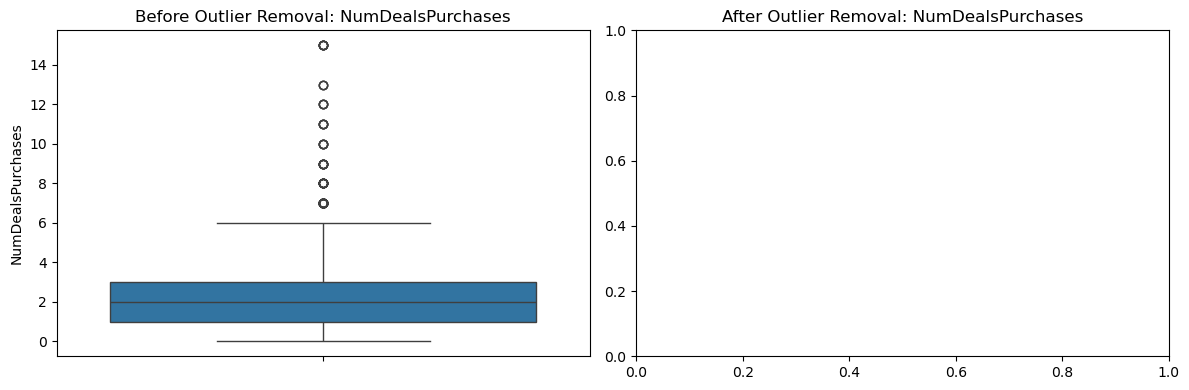

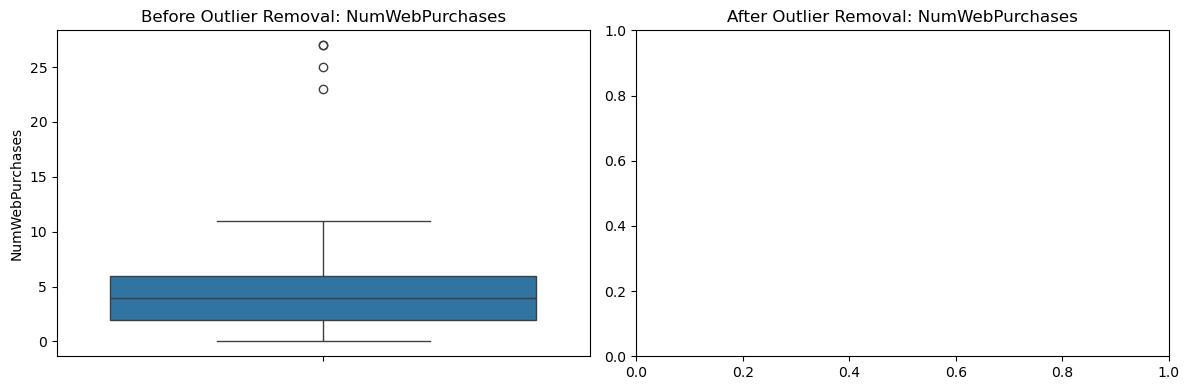

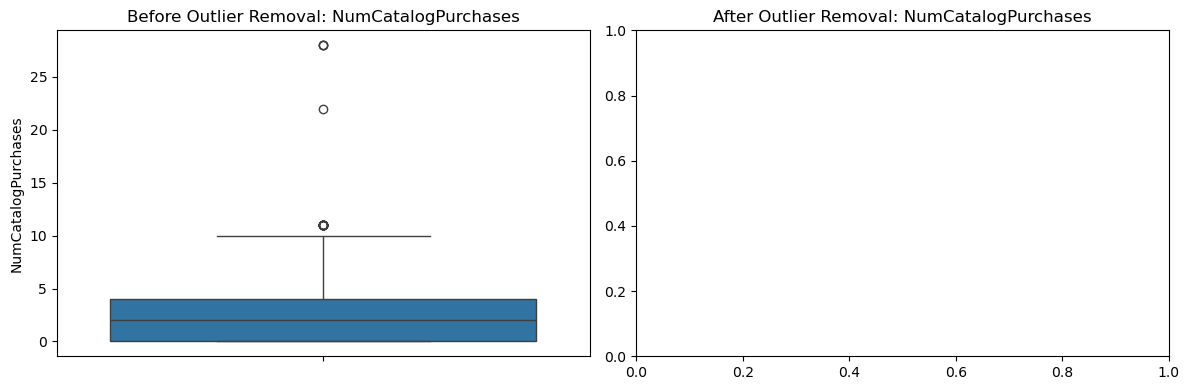

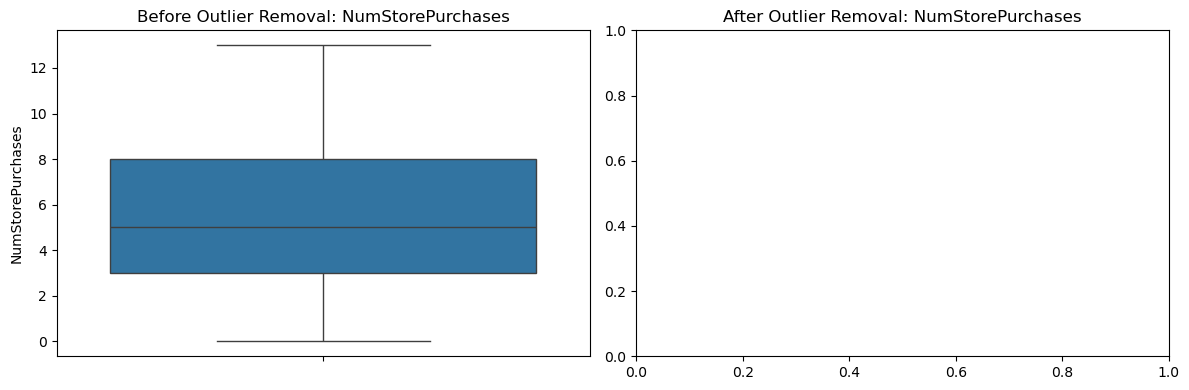

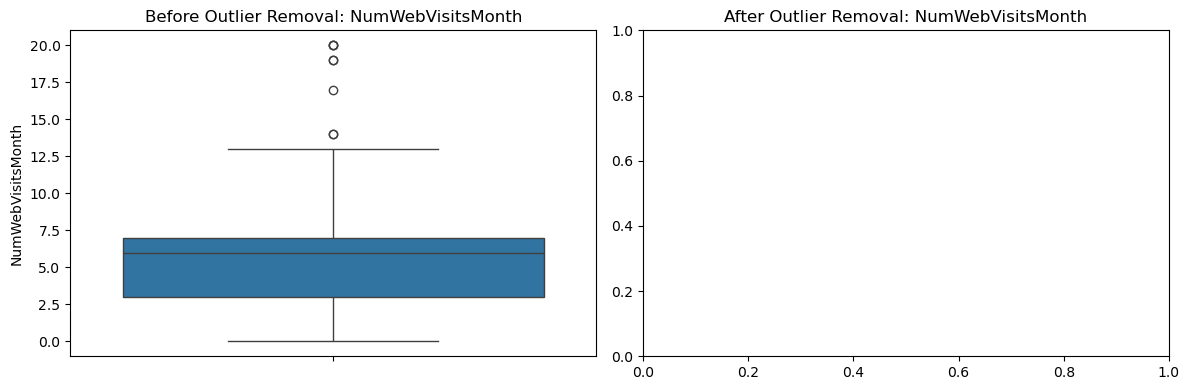

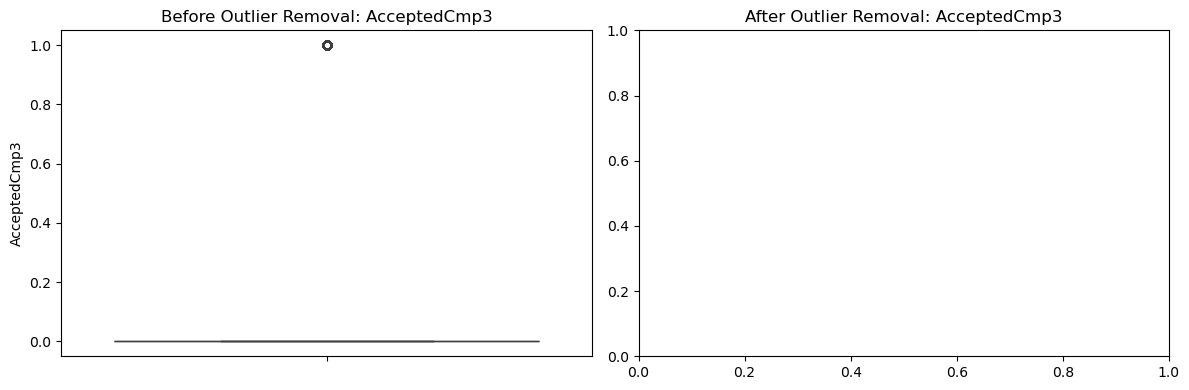

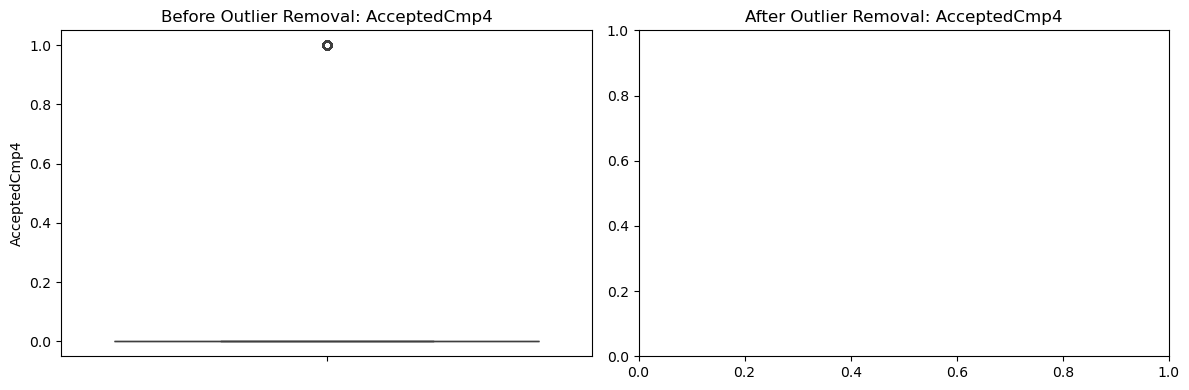

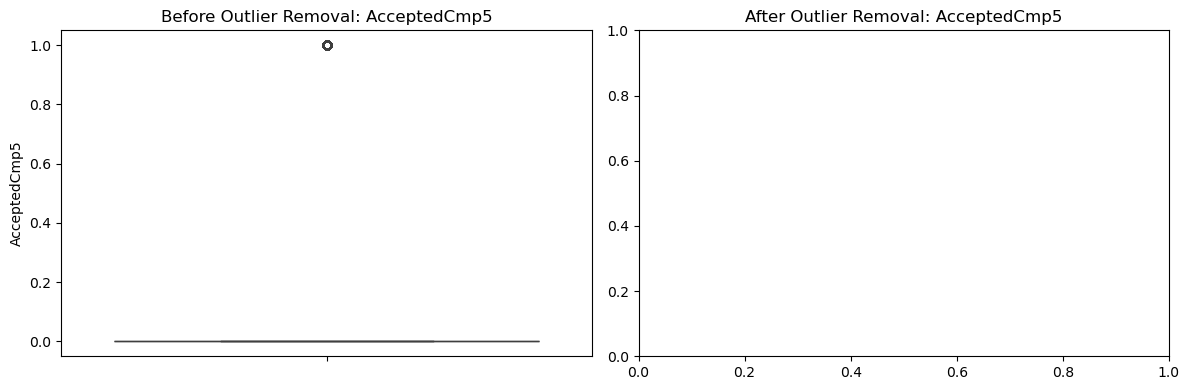

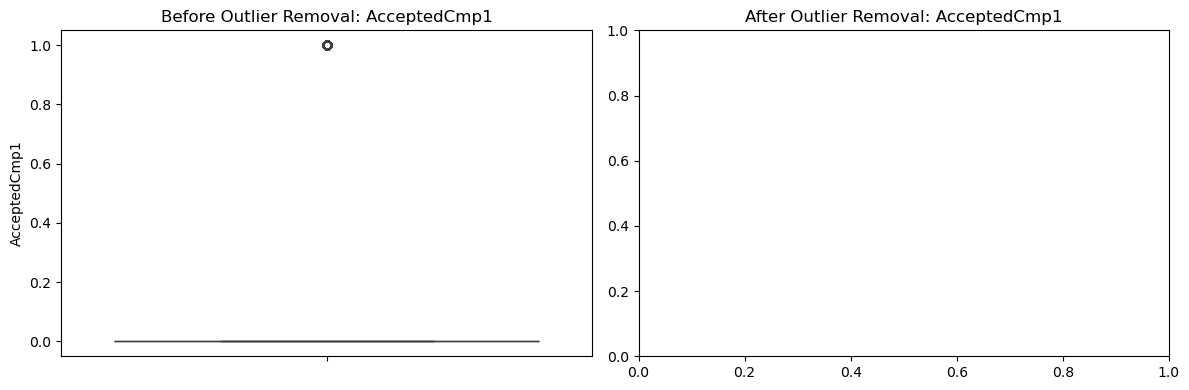

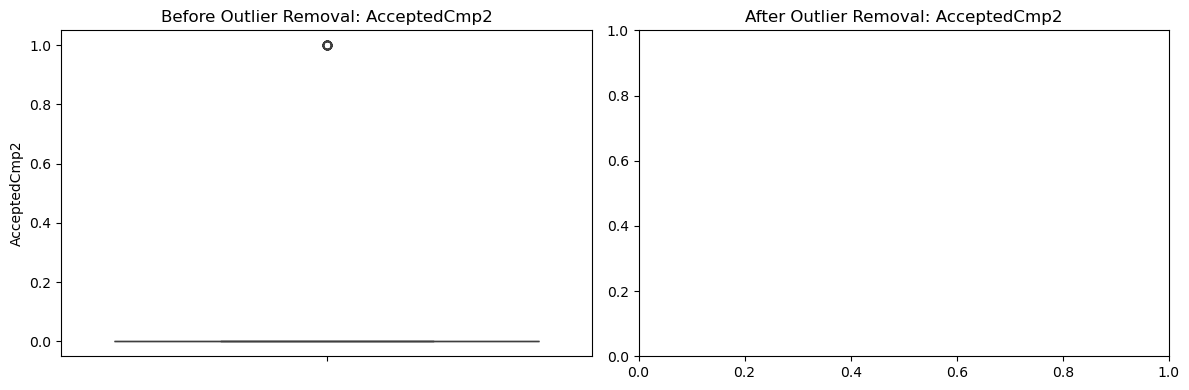

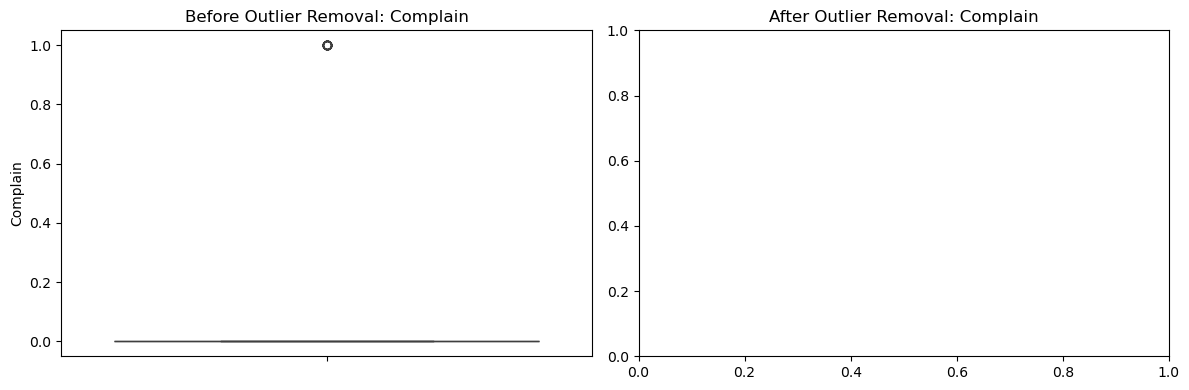

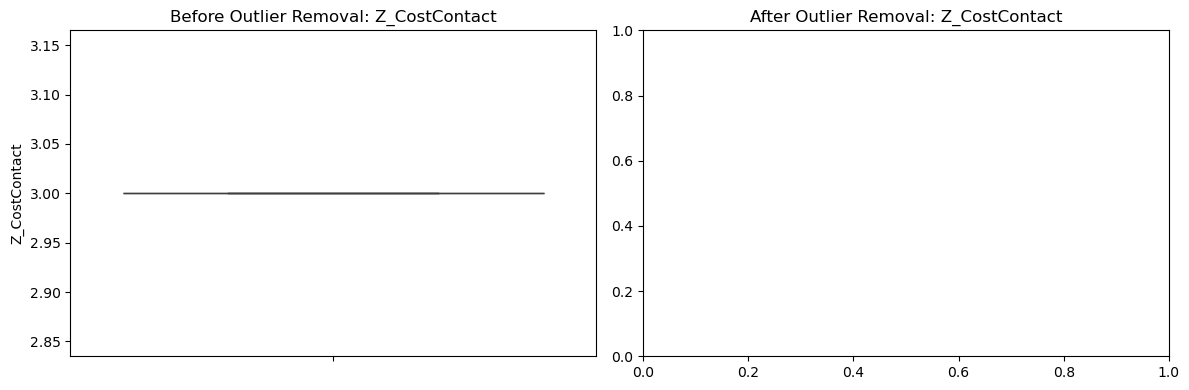

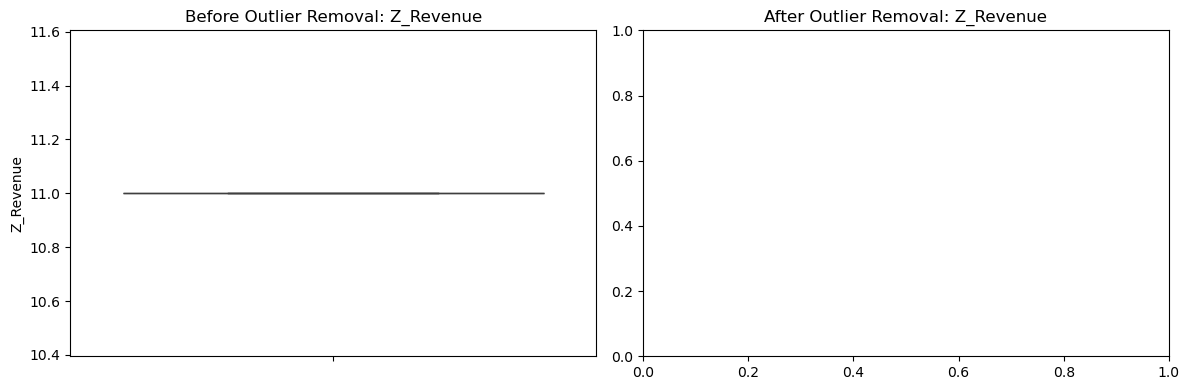

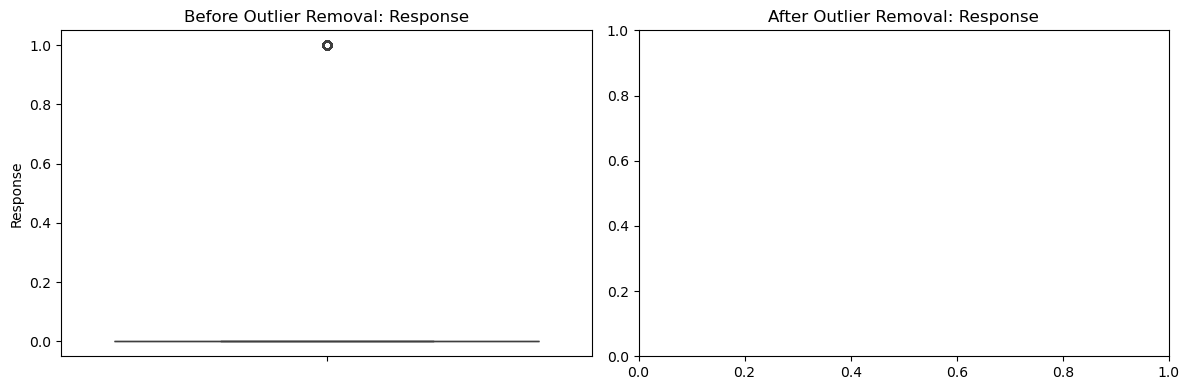

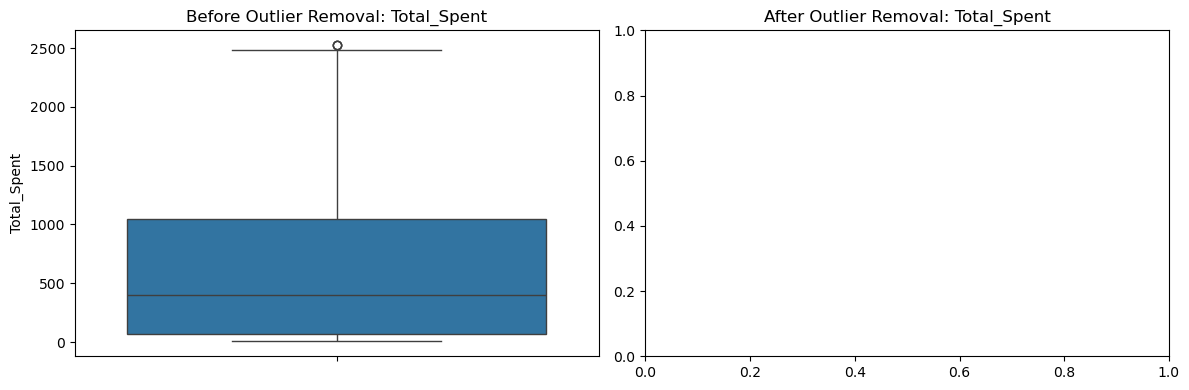

In [21]:

# Boxplot comparison
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(y=df[col], ax=axes[0])
    axes[0].set_title(f'Before Outlier Removal: {col}')
    sns.boxplot(y=df_clean[col], ax=axes[1])
    axes[1].set_title(f'After Outlier Removal: {col}')
    plt.tight_layout()
    plt.show()


**Observation:**

- Z-score method was used to remove outliers (Z > 3).
- This ensures better clustering performance by reducing the influence of extreme values.

## Step 6: Summary of EDA Insights

- Dataset contains both numerical and categorical variables.
- Missing values were identified and visualized.
- No duplicates were found.
- Feature distributions were explored.
- Z-score was used to detect and remove outliers.
- Correlation heatmap provided insights into variable relationships.

EDA is now complete and the dataset is ready for clustering.

## Final Step: Summary of Key Insights
- Data was cleaned and prepared for modeling.
- Income and spending behavior are key differentiators.
- Strong correlations exist between income and high-value product purchases.
- Recency plays a role in identifying active customers.

These insights will help create meaningful customer segments during clustering.

# MODEL BUILDING

## Step 1: Clustering

In [22]:
#Import Libraries
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [23]:
#Features Selection
features = ['Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'Recency', 'Total_Spent']
X = df[features]

#Impute Missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df[features])

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

 **KMeans Clustering**

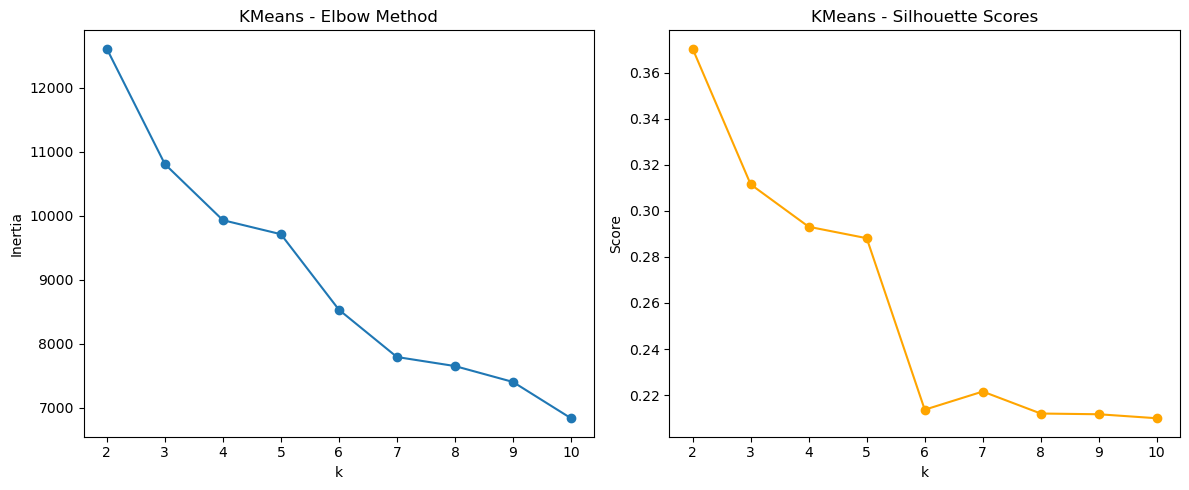

Best k for KMeans: 2 (Silhouette = 0.370)


In [24]:
#Elbow & Silhouette
K_range = range(2, 11)
inertia, sil_scores = [], []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

#Elbow Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'o-')
plt.title("KMeans - Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

#Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, 'o-', color='orange')
plt.title("KMeans - Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

#Choose best K from silhouette
best_k = K_range[np.argmax(sil_scores)]
print(f"Best k for KMeans: {best_k} (Silhouette = {max(sil_scores):.3f})")

# Final KMeans
kmeans_labels = KMeans(n_clusters=best_k, random_state=42).fit_predict(X_scaled)


**DBSCAN Clustering**

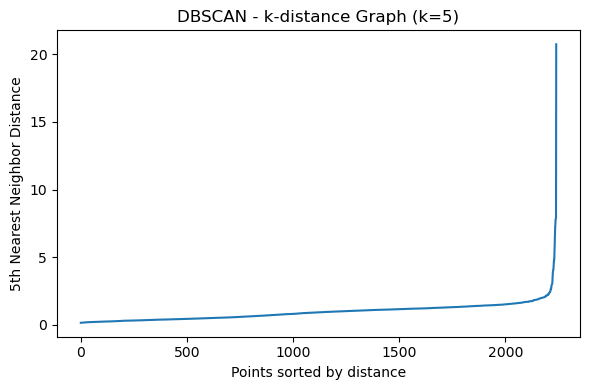

In [25]:
#K-distance Graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])
plt.figure(figsize=(6,4))
plt.plot(distances)
plt.title("DBSCAN - k-distance Graph (k=5)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.tight_layout()
plt.show()

In [26]:
#After choosing eps from graph
for eps in [2.0, 2.2, 2.5]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    db_labels = dbscan.fit_predict(X_scaled)

    if len(set(db_labels)) > 1 and -1 not in set(db_labels):
        score = silhouette_score(X_scaled, db_labels)
        print(f"eps={eps} → silhouette={score:.3f}")
    else:
        print(f"eps={eps} → Not calculated (noise or single cluster)")

eps=2.0 → Not calculated (noise or single cluster)
eps=2.2 → Not calculated (noise or single cluster)
eps=2.5 → Not calculated (noise or single cluster)


**Hierarchical Clustering**

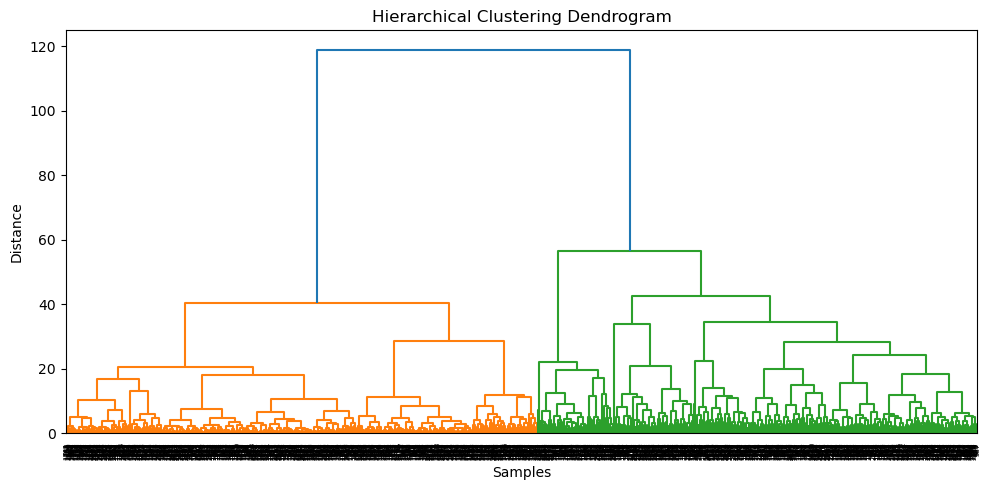

In [27]:
# Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [28]:
#After choosing n_clusters from dendrogram
hier_labels = AgglomerativeClustering(n_clusters=best_k, linkage='ward').fit_predict(X_scaled)
print(f"Hierarchical Silhouette: {silhouette_score(X_scaled, hier_labels):.3f}")

#Save labels to df
df['KMeans_Cluster'] = kmeans_labels
df['DBSCAN_Cluster'] = db_labels
df['Hierarchical_Cluster'] = hier_labels

Hierarchical Silhouette: 0.347


#Step2:PCA Visualization

In [29]:
CSV_PATH = "marketing_campaign.csv"  # <-- put your file path here
RANDOM_STATE = 42
VARIANCE_TARGET = 0.95          # target explained variance for PCA tuning
MAX_PCS_FOR_TUNING = 30         # upper bound for grid
K_RANGE = [2, 3, 4, 5, 6, 7, 8]  # for optional KMeans silhouette
ID_COLS = ["ID"]
DATE_COLS = ["Dt_Customer"]
TARGET_CANDIDATES = ["Response", "AcceptedCmp5", "AcceptedCmp4", "AcceptedCmp3", "AcceptedCmp2", "AcceptedCmp1"]


In [30]:
# columns likely numeric (will auto-detect but this helps imputation)
LIKELY_NUMERIC = [
    "Year_Birth","Income","Kidhome","Teenhome","Recency",
    "MntWines","MntFruits","MntMeatProducts","MntFishProducts",
    "MntSweetProducts","MntGoldProds",
    "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases",
    "NumStorePurchases","NumWebVisitsMonth",
    "AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5",
    "Response","Complain","Z_CostContact","Z_Revenue"
]

In [31]:
LIKELY_CATEGORICAL = ["Education","Marital_Status"]


In [32]:
# Build preprocessing
# Identify numeric vs categorical robustly
numeric_cols = [c for c in df.columns if (c in LIKELY_NUMERIC or np.issubdtype(df[c].dtype, np.number))]
# Remove ID/date-like and non-feature columns from numeric
numeric_cols = [c for c in numeric_cols if c not in ID_COLS + DATE_COLS]

categorical_cols = [c for c in df.columns if (c in LIKELY_CATEGORICAL or df[c].dtype == "O")]
categorical_cols = [c for c in categorical_cols if c not in ID_COLS + DATE_COLS]

In [33]:
# Keep an optional label column (for coloring plots); pick the first available
label_col = None
for cand in TARGET_CANDIDATES + ["Marital_Status","Education"]:
    if cand in df.columns:
        label_col = cand
        break

y = df[label_col] if label_col is not None else None


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocess pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder="drop"
)

In [35]:
def fit_transform_features(df):
    X = preprocessor.fit_transform(df)
    # Build feature names for biplot loadings
    cat_feat_names = []
    if categorical_cols:
        enc = preprocessor.named_transformers_["cat"].named_steps["encoder"]
        cat_feat_names = list(enc.get_feature_names_out(categorical_cols))
    feat_names = numeric_cols + cat_feat_names
    return X, feat_names

X, feature_names = fit_transform_features(df)



In [36]:
 #Cap MAX_PCS_FOR_TUNING to feasible range
max_pcs = min(MAX_PCS_FOR_TUNING, X.shape[1])
pc_grid = list(range(2, max(3, max_pcs) + 1))


#Step3:Tuning

In [37]:
#Tuning 1: Explained variance target
from sklearn.decomposition import PCA
pca_full = PCA(n_components=min(X.shape[0], X.shape[1]), random_state=RANDOM_STATE)
pca_full.fit(X)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_pcs_95 = int(np.searchsorted(cum_var, VARIANCE_TARGET) + 1)


In [38]:
#Tuning 2: Reconstruction error elbow
def reconstruction_mse(X, n_components):
    pca = PCA(n_components=n_components, random_state=RANDOM_STATE)
    X_p = pca.fit_transform(X)
    X_hat = pca.inverse_transform(X_p)
    return np.mean((X - X_hat) ** 2)

recon_errors = []
for n in pc_grid:
    recon_errors.append((n, reconstruction_mse(X, n)))

In [39]:
# Simple elbow: pick the smallest n where the % drop from previous error < 5%
best_n_recon = pc_grid[0]
prev = recon_errors[0][1]
for n, err in recon_errors[1:]:
    drop = (prev - err) / prev if prev > 0 else 0
    if drop < 0.05:
        best_n_recon = n
        break
    prev = err

In [40]:
#Tuning 3(unsupervised):silhouette on PCs with KMeans
def best_pcs_by_silhouette(X, pc_list, k_list):
    best_score, best_n = -1.0, pc_list[0]
    for n in pc_list:
        pca = PCA(n_components=n, random_state=RANDOM_STATE)
        Xn = pca.fit_transform(X)
        # pick best K for that PC dimension
        best_for_n = -1.0
        for k in k_list:
            km = KMeans(n_clusters=k, n_init="auto", random_state=RANDOM_STATE)
            labels = km.fit_predict(Xn)
            if len(set(labels)) == 1:
                continue
            score = silhouette_score(Xn, labels)
            if score > best_for_n:
                best_for_n = score
        if best_for_n > best_score:
            best_score, best_n = best_for_n, n
    return best_n, best_score

best_n_sil, best_sil_score = best_pcs_by_silhouette(X, pc_grid, K_RANGE)


In [41]:
# Final pick (you can prefer variance target; fallbacks to recon or silhouette)
final_n = min(n_pcs_95, best_n_recon, best_n_sil)

In [42]:
# Train PCA with chosen components
pca = PCA(n_components=final_n, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)


In [43]:
print(f"[INFO] Variance-target n_components (≥{int(VARIANCE_TARGET*100)}%): {n_pcs_95}")
print(f"[INFO] Recon-error elbow n_components: {best_n_recon}")
print(f"[INFO] Silhouette-optimal n_components: {best_n_sil} (score={best_sil_score:.3f})")
print(f"[INFO] >>> Using n_components = {final_n}")


[INFO] Variance-target n_components (≥95%): 25
[INFO] Recon-error elbow n_components: 2
[INFO] Silhouette-optimal n_components: 2 (score=0.596)
[INFO] >>> Using n_components = 2


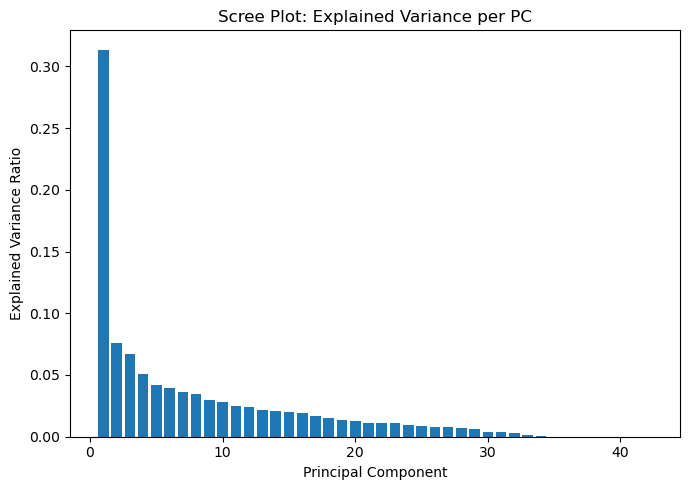

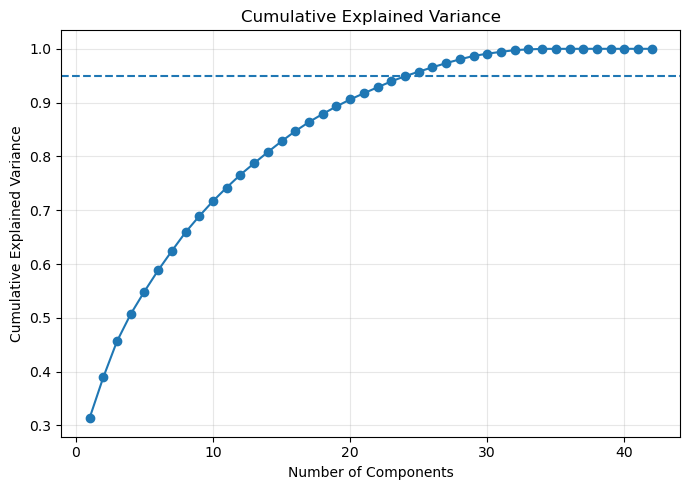

In [44]:
#plots
plt.figure(figsize=(7,5))
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
        pca_full.explained_variance_ratio_)
plt.title("Scree Plot: Explained Variance per PC")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker="o")
plt.axhline(VARIANCE_TARGET, linestyle="--")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


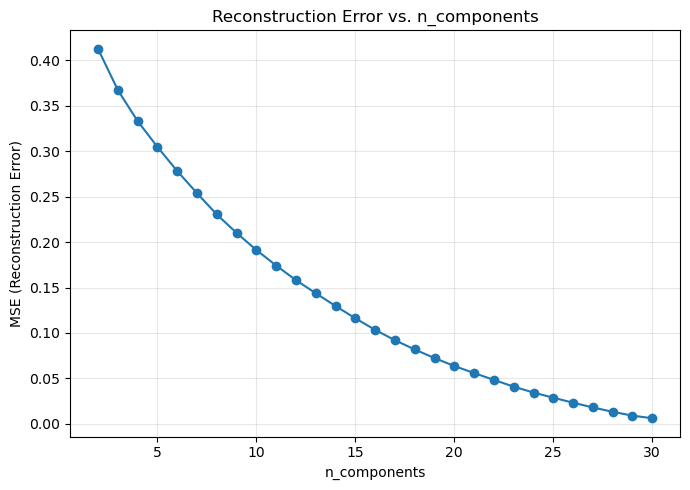

In [45]:
# Reconstruction error elbow
plt.figure(figsize=(7,5))
plt.plot([n for n,_ in recon_errors],
         [err for _,err in recon_errors], marker="o")
plt.title("Reconstruction Error vs. n_components")
plt.xlabel("n_components")
plt.ylabel("MSE (Reconstruction Error)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [46]:
# 2D Scatter (PC1 vs PC2)
def pick_color_series(df, y):
    # Choose best label for coloring
    if y is not None:
        return y
    for alt in ["Marital_Status","Education"]:
        if alt in df.columns:
            return df[alt]
    return pd.Series(["All"]*len(df), index=df.index, name="Group")

color_series = pick_color_series(df, y)
pc1, pc2 = X_pca[:,0], X_pca[:,1]

plt.figure(figsize=(7,6))

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

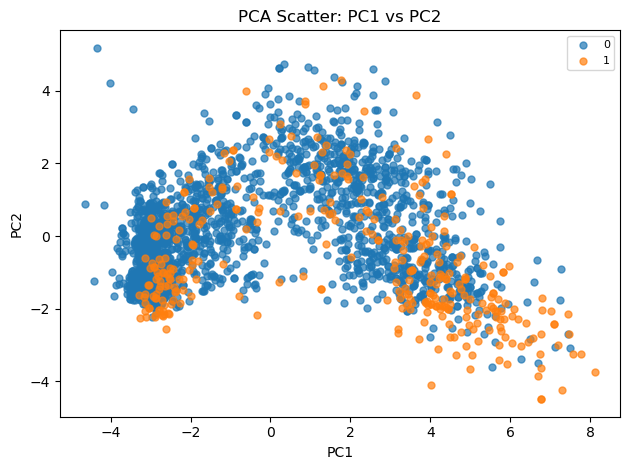

In [47]:
# simple distinct groups
groups = pd.Series(color_series).astype(str)
for g in sorted(groups.unique()):
    idx = (groups == g).values
    plt.scatter(pc1[idx], pc2[idx], s=25, alpha=0.7, label=str(g))
plt.title("PCA Scatter: PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="best", fontsize=8, frameon=True)
plt.tight_layout()
plt.show()


In [48]:
# 3D Scatter (PC1, PC2, PC3) if available
if X_pca.shape[1] >= 3:
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    for g in sorted(groups.unique()):
        idx = (groups == g).values
        ax.scatter(X_pca[idx,0], X_pca[idx,1], X_pca[idx,2], s=20, alpha=0.7, label=str(g))
    ax.set_title("PCA Scatter: 3D (PC1, PC2, PC3)")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.legend(loc="best", fontsize=8)
    plt.tight_layout()
    plt.show()

In [49]:
# Biplot (PC1 vs PC2) with top loadings
def pca_biplot(pca, feature_names, X_pca, color_series, top_n=12, scale_arrows=1.0):
    # loadings: components_[pc, feature]
    loadings = pca.components_[:2, :]  # first two PCs
    # pick top absolute loadings across the two PCs
    magnitudes = np.sqrt(loadings[0]**2 + loadings[1]**2)
    idx_sorted = np.argsort(magnitudes)[-top_n:]
    plt.figure(figsize=(8,7))
    groups = pd.Series(color_series).astype(str)
    for g in sorted(groups.unique()):
        idx = (groups == g).values
        plt.scatter(X_pca[idx,0], X_pca[idx,1], s=18, alpha=0.6, label=str(g))
    for i in idx_sorted:
        x = loadings[0, i] * scale_arrows * X_pca[:,0].std()
        y = loadings[1, i] * scale_arrows * X_pca[:,1].std()
        plt.arrow(0, 0, x, y, head_width=0.05*max(X_pca[:,0].std(), X_pca[:,1].std()),
                  length_includes_head=True, alpha=0.8)
        plt.text(x*1.07, y*1.07, feature_names[i], fontsize=8)
    plt.title("PCA Biplot (PC1 vs PC2) — Top Loadings")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(loc="best", fontsize=8)
    plt.axhline(0, color="gray", linewidth=0.5)
    plt.axvline(0, color="gray", linewidth=0.5)
    plt.tight_layout()
    plt.show()


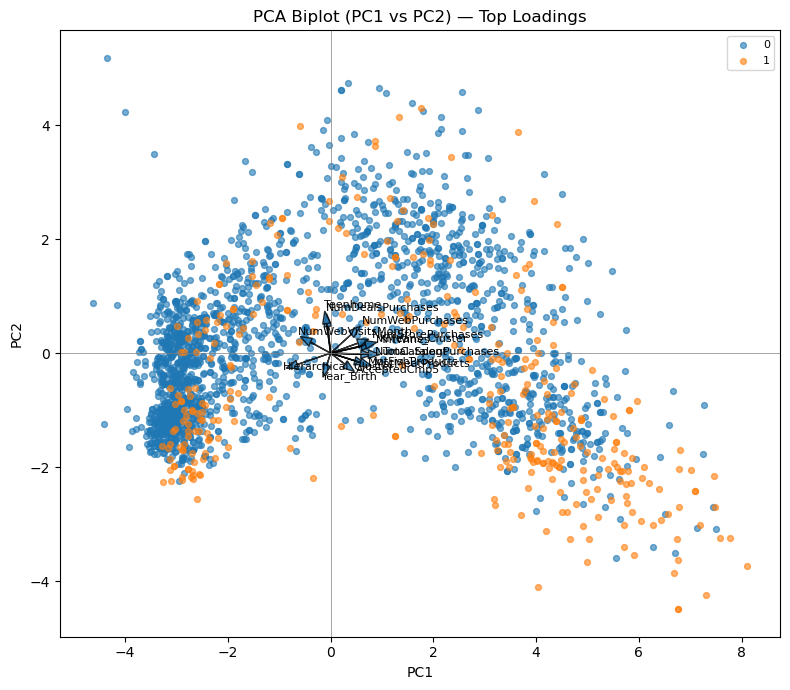

In [50]:
# Only build biplot if we have feature names aligned to PCA fit on same feature order
try:
    pca_biplot(pca, feature_names, X_pca, color_series, top_n=14, scale_arrows=1.0)
except Exception as e:
    print(f"[WARN] Biplot skipped: {e}")

In [52]:
#Quick report on key PCs and variance
from sklearn.decomposition import PCA
var_ratio = pca.explained_variance_ratio_
print(f"[INFO] Final PCA explains {var_ratio.sum():.3f} total variance with {final_n} PCs.")
print("[INFO] Top PCs by variance:")
for i, v in enumerate(var_ratio, start=1):
    print(f"  PC{i}: {v:.4f}")

[INFO] Final PCA explains 0.389 total variance with 2 PCs.
[INFO] Top PCs by variance:
  PC1: 0.3135
  PC2: 0.0758


In [ ]:
# here we did a pipeline it shows the structure of Pkl file

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Example pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=3)),  # choose number of PCs
    ("kmeans", KMeans(n_clusters=3))  # choose number of clusters
])

# Fit the pipeline on your data (X_scaled or raw X)
pipeline.fit(X)  # X is your feature matrix


,steps,"[('scaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'


In [56]:
# mdoel deployment pkl file here
import pickle

# Example: if you have a pipeline (scaler + pca + clustering)
with open("clustering_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)